# Spectral analysis of ECG signal using Python packages. 

Or use frequencies to get embeddings (use images of ECG)

- Fourier & Wavelet Spectrograms

In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
from scipy.signal import resample
import torch
from transformers import AutoTokenizer, AutoModel
import ast
import scipy.io as sio
from scipy.signal import spectrogram

In [2]:
sys.path.append('C:/Users/navme/Desktop/ECG_Project/PyFiles')

In [3]:
from helper_functions import *
from dataset import PhysioNetDataset

In [4]:
PhysioNet_PATH = f'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training'
PhysioNet_PATH

'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training'

In [6]:
train_set = PhysioNetDataset(PhysioNet_PATH, train=True)
val_set = PhysioNetDataset(PhysioNet_PATH, train=False)

In [9]:
train_set[0][1]

{'val': array([[408.24601882, 408.24601882, 408.24601882, ..., -83.34581329,
         -74.965045  , -63.10339951],
        [-92.07603073, -92.07603073, -92.07603073, ...,  57.20010276,
          54.51591647,  58.88514819],
        [225.08001192, 225.08001192, 225.08001192, ...,  93.39571052,
          97.44912853, 117.96825132]])}

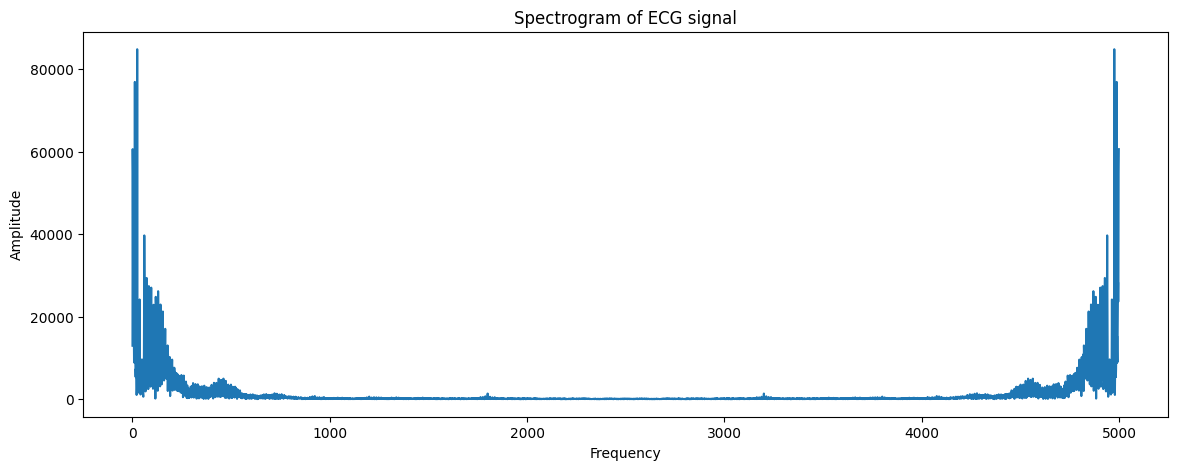

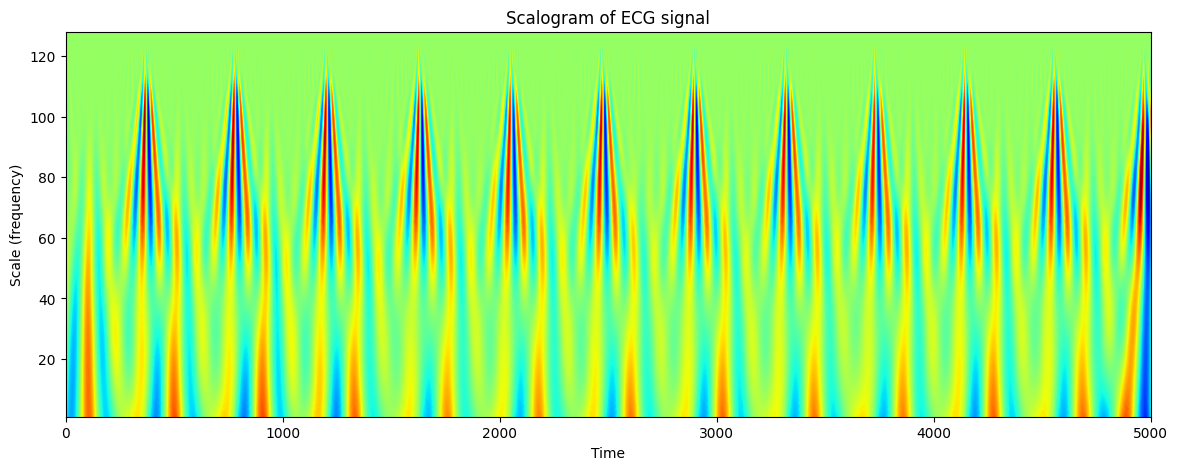

In [25]:
import matplotlib.pyplot as plt
from scipy.fft import fft
import pywt

# 1. Extract ECG signal
# Assuming the 'val' is your ECG signal and selecting the first lead
index = 25250  # change this to choose different signals
ecg_data = train_set[index][1]['val']
ecg_signal = ecg_data[0]  # selecting the first lead

# 2. Apply Fourier Transform
ecg_fft = fft(ecg_signal)

# 3. Visualize Fourier Transform (Spectrogram)
plt.figure(figsize=(14, 5))
plt.plot(np.abs(ecg_fft))
plt.title('Spectrogram of ECG signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

# 4. Apply Wavelet Transform
waveletname = 'morl'
coeffs, freqs = pywt.cwt(ecg_signal, np.arange(1, 128), waveletname)

# 5. Visualize Wavelet Transform (Scalogram)
plt.figure(figsize=(14, 5))
plt.imshow(coeffs, aspect='auto', cmap='jet', 
           extent=[0, len(ecg_signal), 1, 128])
plt.title('Scalogram of ECG signal')
plt.xlabel('Time')
plt.ylabel('Scale (frequency)')
plt.show()

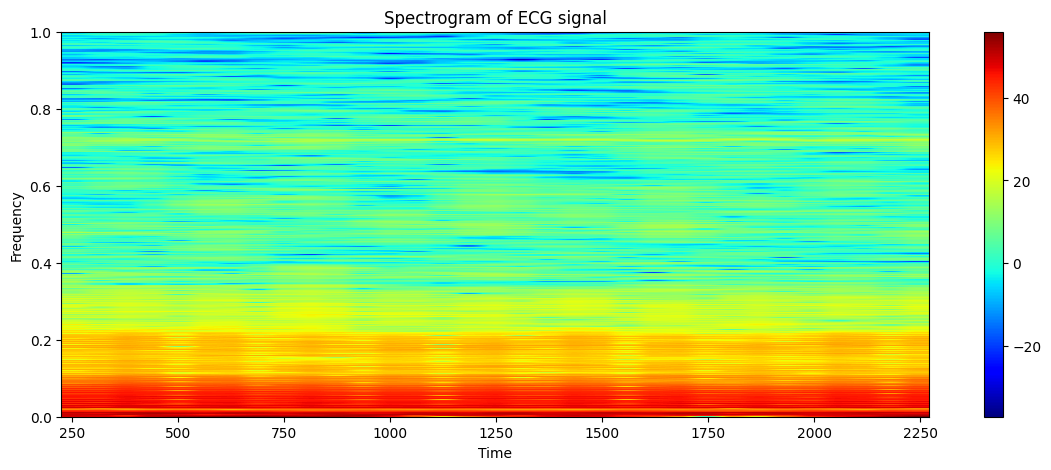

In [27]:
# 6. Apply Fourier Transform and plot spectrogram
plt.figure(figsize=(14, 5))
Pxx, freqs, bins, im = plt.specgram(ecg_signal, NFFT=1024, Fs=2, noverlap=900, cmap='jet')
plt.title('Spectrogram of ECG signal')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()

# Save the figure as an image
plt.savefig('spectrogram_example.png', dpi=300, bbox_inches='tight')

plt.show()

# ECGSpectrogramGenerator()

In [37]:
class ECGSpectrogramGenerator:
    def __init__(self, ecg_signals, save_dir):
        self.ecg_signals = ecg_signals
        self.save_dir = save_dir

    def generate_spectrogram(self, ecg_signal, recording_number):
        for lead_id, lead_signal in enumerate(ecg_signal):
            plt.figure(figsize=(14, 5))
            Pxx, freqs, bins, im = plt.specgram(lead_signal, NFFT=1024, Fs=2, noverlap=900, cmap='jet')
            plt.title(f'Spectrogram of ECG signal {recording_number}, lead {lead_id}')
            plt.xlabel('Time')
            plt.ylabel('Frequency')
            plt.colorbar()

            # Save the figure as an image
            plt.savefig(os.path.join(self.save_dir, f'spectrogram_{recording_number}_lead_{lead_id}.png'), dpi=300, bbox_inches='tight')
            plt.close()

In [39]:
ecg_spectrogram_generator = ECGSpectrogramGenerator(train_set, 'C:/Users/navme/Desktop/ECG_Project/Notebooks')

In [44]:
train_set[0][1]['val'].shape

(3, 5000)

In [41]:
for i in range(5):  # only process the first 5 data points
    ecg_signal = train_set[i][1]['val']
    print(f'Shape of ECG signal {i}: {ecg_signal.shape}')  # print the shape of the ECG signal
    recording_number = train_set[i][0]['recording_number']
    ecg_spectrogram_generator.generate_spectrogram(ecg_signal, recording_number)

Shape of ECG signal 0: (3, 5000)
Shape of ECG signal 1: (3, 5000)
Shape of ECG signal 2: (3, 5000)
Shape of ECG signal 3: (3, 5000)
Shape of ECG signal 4: (3, 5000)


In [ ]:
Notebooks/spectrogram_JS00001_lead_0.png Notebooks/spectrogram_JS00001_lead_1.png Notebooks/spectrogram_JS00001_lead_2.png Notebooks/spectrogram_JS00002_lead_0.png Notebooks/spectrogram_JS00002_lead_1.png Notebooks/spectrogram_JS00002_lead_2.png Notebooks/spectrogram_JS00004_lead_0.png Notebooks/spectrogram_JS00004_lead_1.png Notebooks/spectrogram_JS00004_lead_2.png Notebooks/spectrogram_JS00005_lead_0.png Notebooks/spectrogram_JS00005_lead_1.png